**1. Import the required libraries and read the dataset.**

In [1]:
import math
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt   
plt.style.use('classic')

import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
data1 = data.copy()

- Here the the required libraries are imported.
- The dataset is imported.
- Made a copy of the dataset.

**2. Check the first few samples, shape, info of the data and try to familiarize yourself with different
features.**

In [4]:
data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data1.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


- Checked first and last few samples.

In [6]:
data1.shape

(5000, 14)

- Rows : 5000
- Columns : 14

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- Here we can see the information about the dataset.
- Here we can see that the dataset have 5000 rows and 14 columns.
- The datatypes are also shown above. dtypes: float64(1), int64(13).
- The memory used by the dataset is 547.0 KB.

In [8]:
data1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- No null values are present.

In [9]:
data1.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

- In the above data we can see that how many unique categories are there in each variable.

In [10]:
data1['Education']= data1['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [11]:
data1 = pd.get_dummies(data1, columns=['Education'])
data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


- 'Education" is a categorical variable.
- Here we replaced the category level with their correct labels.
- So we converted the 'Education' column into 3 columns, beacuse it have 3 categories.

**3. Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the
columns which you feel are redundant.**

In [12]:
data1.duplicated().sum()

0

In [13]:
data1.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
data1.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


- There are no duplicate records present in the dataset.
- And the columns 'ID' & 'ZIP Code' are dropped because they are redundant values while building a model.

**4. Display the Five Point Summary and write your key findings.**

In [14]:
data1.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.300200,0.280600,0.419200
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.458391,0.449337,0.493478
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


The five number summary helps describe the center, spread and shape of data. The five summary statistics are as follows,
-Minimum
-Q1(25%)
-Q2(50%)
-Q3(75%)
-Maximum

Here we can say that:

- Age : The mean for age is around 45 years. The max is 67 years and the min is 23 years.
- Experience : The mean for experience is around 20 years. The max is 43 years and the min is -3 years. The -3 value will be an error. Beacuse experience can,t be expressed in negative value.
- Income : The mean for income is around 73 dollars. The max is 224 dollars and the min is 8 dollars.
- Family : The mean for family is around 2 as family size. The max is 4 as family size and the min is 1 as family size.
- CCAvg : The mean for CCAvg is around 2 dollars. The max is 10 dollars and the min is 0 dollars.
- Mortgage : The mean for mortgage is around 56 dollars. The max is 635 dollars and the min is 0 dollars.

From these data we can say that the the characteristics or the the type of people who takes the personal loan and the people who don't take the personal loan. That is we can identify the minimum, maximum & average of the people's age, income, experience level, education level, family size etc...

**5. There are negative values in the variable 'Experience'. Convert them to non-negative values. (Hint:
.abs function)**

In [15]:
data1['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [16]:
data1[data1['Experience'] < 0]

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
89,25,-1,113,4,2.30,0,0,0,0,0,1,1,0,0
226,24,-1,39,2,1.70,0,0,0,0,0,0,0,1,0
315,24,-2,51,3,0.30,0,0,0,0,1,0,1,0,0
451,28,-2,48,2,1.75,89,0,0,0,1,0,1,0,0
524,24,-1,75,4,0.20,0,0,0,0,1,0,0,0,1
536,25,-1,43,3,2.40,176,0,0,0,1,0,0,1,0
540,25,-1,109,4,2.30,314,0,0,0,1,0,1,0,0
576,25,-1,48,3,0.30,0,0,0,0,0,1,1,0,0
583,24,-1,38,2,1.70,0,0,0,0,1,0,0,1,0
597,24,-2,125,2,7.20,0,0,1,0,0,1,0,0,1


In [17]:
data1['Experience'] = data1['Experience'].apply(lambda x: abs(x))
data1['Experience'].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

- Here the negative values in the variable 'Experience' are converted into non-negative values using abs function.

**6. Get the target column distribution and comment on the class distribution.**

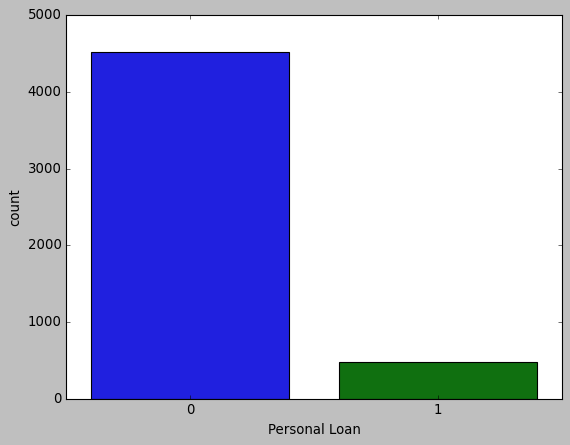

In [18]:
sns.countplot(x = 'Personal Loan', data = data1)
plt.show()

- Here we can see that the percentage of people who didn't accept the Personal Loan is higher than the people who accept the Personal Loan

In [19]:
data1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

*People who didn't accepts the Personal Loan : 0*
- Total count of people who didn't accept the Personal Loan are 4520.

*People who accepts the Personal Loan : 1*
- Total count of people who accept the Personal Loan are 480.

**7. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X
variable.**

In [20]:
data2 = data1.copy()

In [21]:
X = data2.drop('Personal Loan',axis=1)
y = data2[['Personal Loan']]

In [22]:
X

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,0,0,1,0,1,0,0
4996,30,4,15,4,0.4,85,0,0,1,0,0,0,1
4997,63,39,24,2,0.3,0,0,0,0,0,1,0,0
4998,65,40,49,3,0.5,0,0,0,1,0,0,1,0


In [23]:
y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


- Here we stored the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X variable.

**8. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the
z-score scaling approach.**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(3500, 13) (1500, 13)
(3500, 1) (1500, 1)


In [25]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [26]:
X_train_scaled

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
1334,0.135977,0.153967,-0.837058,-0.344955,-0.365708,-0.557707,-0.341736,-0.258356,0.831648,-0.650648,-0.657773,-0.627146,1.185537
4768,-0.646212,-0.544409,-0.750406,-1.217944,0.037876,-0.557707,-0.341736,-0.258356,0.831648,-0.650648,-0.657773,1.594525,-0.843500
65,1.178895,1.288828,1.242590,-1.217944,1.075664,-0.557707,-0.341736,-0.258356,0.831648,1.536929,-0.657773,-0.627146,1.185537
177,-1.428400,-1.504676,-0.187168,1.401022,-0.077434,1.869923,-0.341736,-0.258356,-1.202432,-0.650648,-0.657773,1.594525,-0.843500
4489,-0.559302,-0.631706,-1.140340,0.528033,-0.999912,-0.557707,-0.341736,-0.258356,0.831648,-0.650648,-0.657773,1.594525,-0.843500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.265805,1.376125,-0.750406,1.401022,-0.365708,0.835195,-0.341736,-0.258356,0.831648,-0.650648,-0.657773,1.594525,-0.843500
2763,0.831255,0.939640,-1.313644,1.401022,-0.711638,-0.557707,-0.341736,-0.258356,0.831648,-0.650648,-0.657773,-0.627146,1.185537
905,0.049067,0.153967,-0.988699,-1.217944,-0.538673,0.278035,-0.341736,-0.258356,0.831648,1.536929,-0.657773,-0.627146,1.185537
3980,0.049067,0.153967,0.332744,1.401022,-0.308053,-0.557707,-0.341736,-0.258356,0.831648,-0.650648,-0.657773,1.594525,-0.843500


In [27]:
X_test_scaled

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
2764,-1.242790,-1.316716,0.216827,-1.214350,0.536483,0.454521,-0.340693,-0.242022,-1.250641,1.580033,1.542199,-0.618457,-0.863838
4767,-0.890526,-0.963172,-0.636250,0.521262,-0.588707,0.416218,2.935198,-0.242022,-1.250641,-0.632898,-0.648425,-0.618457,1.157624
3814,-0.978592,-0.963172,-0.854987,0.521262,-0.363669,-0.550944,-0.340693,-0.242022,-1.250641,-0.632898,-0.648425,-0.618457,1.157624
3499,0.342401,0.274232,0.873040,-1.214350,-0.926263,2.187751,-0.340693,-0.242022,0.799590,-0.632898,-0.648425,-0.618457,1.157624
2735,-0.802459,-0.698014,-0.089405,0.521262,0.367704,1.029072,-0.340693,-0.242022,0.799590,-0.632898,-0.648425,1.616929,-0.863838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,1.575328,1.600022,-0.920608,-1.214350,-0.251150,-0.550944,-0.340693,-0.242022,-1.250641,-0.632898,-0.648425,1.616929,-0.863838
3969,-0.626327,-0.786400,0.019963,0.521262,0.215804,-0.550944,-0.340693,-0.242022,0.799590,-0.632898,-0.648425,1.616929,-0.863838
2535,0.430468,0.451004,-1.161220,-0.346544,-0.701226,0.684342,-0.340693,-0.242022,-1.250641,-0.632898,1.542199,-0.618457,-0.863838
1361,0.430468,0.539390,-0.789366,1.389069,-0.588707,-0.550944,-0.340693,-0.242022,0.799590,-0.632898,-0.648425,1.616929,-0.863838


In [28]:
y_train_scaled

,Personal Loan
1334,-0.323186
4768,-0.323186
65,-0.323186
177,-0.323186
4489,-0.323186
...,...
2895,-0.323186
2763,-0.323186
905,-0.323186
3980,-0.323186


In [29]:
y_test_scaled

,Personal Loan
2764,-0.332097
4767,-0.332097
3814,-0.332097
3499,-0.332097
2735,-0.332097
...,...
4140,-0.332097
3969,-0.332097
2535,-0.332097
1361,-0.332097


- Here the dataset is split into two parts (i.e. 70% train and 30% test) and the columns are standardized using the z-score scaling method.

**9. Train and test a Logistic Regression model to predict the likelihood of a liability customer buying
personal loans. Display the train and test accuracy scores.**

In [30]:
log_reg = LogisticRegression()

In [31]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = log_reg.predict(X_test)
y1_pred = log_reg.predict(X_train)

In [33]:
print("Intercept of the model is",log_reg.intercept_)

Intercept of the model is [-0.34227802]


In [34]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, log_reg.coef_[0][idx]))

The coefficient for Age is -0.3915109640360732
The coefficient for Experience is 0.39241877919953067
The coefficient for Income is 0.05460775933329737
The coefficient for Family is 0.7013210706959909
The coefficient for CCAvg is 0.19418585577434525
The coefficient for Mortgage is 0.0008908778377616401
The coefficient for Securities Account is -0.1307139805151274
The coefficient for CD Account is 2.1432252589846397
The coefficient for Online is -0.4674662613184727
The coefficient for CreditCard is -0.49530060935762077
The coefficient for Education_Advanced/Professional is 1.061862392453888
The coefficient for Education_Graduate is 1.1036065127088388
The coefficient for Education_Undergrad is -2.4944668940850447


Here we can see that these independent variables share positive and negative relations with respect to the target variable.

In [35]:
y_predict = log_reg.predict(X_test)
train_model_score = log_reg.score(X_train, y_train)
test_model_score = log_reg.score(X_test, y_test)
print('The accuracy score for the train data is ',train_model_score)
print('The accuracy score for the test data is ',test_model_score)

The accuracy score for the train data is  0.9577142857142857
The accuracy score for the test data is  0.9573333333333334


- Here we can say that the accuracy is almost same for the train and test data
- We can say that the model shows a perfect fit, that is no over-fit or under-fit.

**10. Print the confusion matrix and classification report for the model and write your conclusions on the
results.**

In [36]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1343    8]
 [  56   93]]


The elements of the above confusion matrix:

- **True Positives (TP):** 93
- **True Negatives (TN):** 1343
- **False Positives (FP):** 8
- **False Negatives (FN):** 56

From these informations we can obtain the **"Accuracy, Precision, Recall & F1-Score** of the sample where the people accepts the Personal Loan.

- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

In [37]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.92      0.62      0.74       149

    accuracy                           0.96      1500
   macro avg       0.94      0.81      0.86      1500
weighted avg       0.96      0.96      0.95      1500



**(a) People who didn't accepts the Personal Loan : 0**

Here we can see that :-

   - **Precision (0.96):** Have a high precision. It means that approximately 96% of the time the people won't accept the Personal Loan.
   - **Recall (0.99):** The recall is also high, It means that the model captures about 99% of the category "0".
   - **F1-Score (0.98):** The F1-score is also high (0.98).


**(b) People who accepts the Personal Loan : 1**

Here we can see that :-

   - **Precision (0.92):** It is a high precision value but when compariong to the category "0" it is low. which means that when it predicts class 1, It means that approximately 92% of the time the people will accept the Personal Loan.
   - **Recall (0.62):** The recall is a low value, It means that the model only captures about 62% of the category "1".
   - **F1-Score (0.74):** The F1-score is moderate value(0.74).
   
**(c) Accuracy (0.96)** : The overall accuracy of the model is high (0.96). That is the model explains 96% of the data.

**(d) Macro Average:** : Here the values for precision, recall and F1-Score are high, which shows a good indication.

**(e) Weighted Average:** : Here the values for precision, recall and F1-Score are high, which shows a good indication.
